In [1]:
# 피마 인디언 당뇨병 예측

* Pregnancies: 임신횟수


* Glucose: 포도당 부하 검사 수치


* BloodPressure: 혈압


* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)


* Insulin: 혈청 인슐린


* BMI: 체질량지수(체중(kg)/키(m))^2)


* DiabetesPedigreeFunction: 당뇨 내력 가중치값


* Age: 나이


* Outcome: 클래스 결정 값(0또는 1)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

diabetes_df = pd.read_csv('./data/diabetes.csv')

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
def get_con_matrix(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    #f1 score 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    #f1 score print추가
    print('accuracy: {0:.4f}, precision:{1:.4f}, recall:{2:.4f}, f1:{3:.4f}, roc_auc:{4:.4f}'.format(accuracy,
                                                                                                    p_score,
                                                                                                    r_score,
                                                                                                    f1,
                                                                                                    roc_auc))
    

In [15]:
X = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df.iloc[:,-1]

In [54]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,                                                  
                                                   stratify=y)

# fitting 시작
# from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
get_con_matrix(y_test,pred_lr)

# from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
get_con_matrix(y_test,pred_dt)

# from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)
get_con_matrix(y_test,pred_rf)

오차 행렬
[[90 10]
 [25 29]]
accuracy: 0.7727, precision:0.7436, recall:0.5370, f1:0.6237, roc_auc:0.7185
오차 행렬
[[79 21]
 [19 35]]
accuracy: 0.7403, precision:0.6250, recall:0.6481, f1:0.6364, roc_auc:0.7191
오차 행렬
[[83 17]
 [21 33]]
accuracy: 0.7532, precision:0.6600, recall:0.6111, f1:0.6346, roc_auc:0.7206


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# 정확도보다는 재현율 성능에 좀 더 초점을 맞추어 developing을 시작

In [62]:
def p_r_curve_plot(y_test, pred_proba):
    # threshold ndarray로 가져와보고 
    # 위의 threshold에 따른 정밀도, 재현율의 ndarray를 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # X축 = threshold
    # y축은 precision(점선) 및 recall(주황선) 설정
    # 각 곡선을 중첩되게 graph화
    plt.figure(figsize=(8,6))
    threshold_boudary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boudary], linestyle='--', label='precison')
    plt.plot(thresholds, recalls[0:threshold_boudary], label='recall')
    
    # threshold 값 x 축의 scale을 0,1으로 scaling
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.10),2))
    
    # X축, y축 label 및 legend 추가
    # grid도 추가
    plt.xlabel('Threshold_value')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()
    plt.show() 

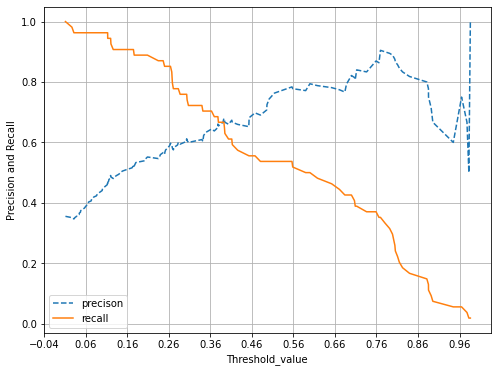

In [63]:
pred_proba = lr_clf.predict_proba(X_test)[:,1]
p_r_curve_plot(y_test,pred_proba)

In [65]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

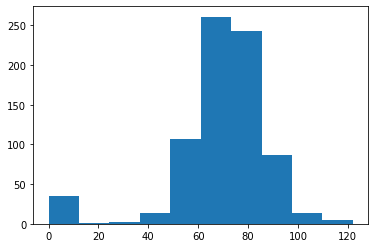

In [68]:
plt.hist(diabetes_df['BloodPressure'], bins=10)

In [72]:
diabetes_df[diabetes_df['Glucose']==0]['Glucose'].count()

5

In [74]:
# 0값이 있는 feature 확인해볼 ftrs :: Glucose BloodPressure SkinThickness Insulin BMI

zero_ftrs = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_cnt = diabetes_df.Glucose.count()

for ftr in  zero_ftrs:
    z_cnt = diabetes_df[diabetes_df[ftr]==0][ftr].count()
    print('{0}의 0건수는 {1}, 퍼센트는{2:.2f} %'.format(ftr,z_cnt,(z_cnt/total_cnt)*100))

Glucose의 0건수는 5, 퍼센트는0.65 %
BloodPressure의 0건수는 35, 퍼센트는4.56 %
SkinThickness의 0건수는 227, 퍼센트는29.56 %
Insulin의 0건수는 374, 퍼센트는48.70 %
BMI의 0건수는 11, 퍼센트는1.43 %


In [77]:
mean_zero_ftrs = diabetes_df[zero_ftrs].mean()
diabetes_df[zero_ftrs] = diabetes_df[zero_ftrs].replace(0,mean_zero_ftrs)

In [78]:
X_scaled = diabetes_df.drop(['Outcome'],axis=1)
y_scaled = diabetes_df.iloc[:,-1]

# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,                                                  
                                                   stratify=y)

# fitting 시작
# from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
get_con_matrix(y_test,pred_lr)

# from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
get_con_matrix(y_test,pred_dt)

# from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)
get_con_matrix(y_test,pred_rf)

오차 행렬
[[93  7]
 [33 21]]
accuracy: 0.7403, precision:0.7500, recall:0.3889, f1:0.5122, roc_auc:0.6594
오차 행렬
[[80 20]
 [28 26]]
accuracy: 0.6883, precision:0.5652, recall:0.4815, f1:0.5200, roc_auc:0.6407
오차 행렬
[[91  9]
 [27 27]]
accuracy: 0.7662, precision:0.7500, recall:0.5000, f1:0.6000, roc_auc:0.7050


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    Iter = 0
    for custom_threshold in thresholds:
        Iter +=1
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계치', custom_threshold)
        accuracy = accuracy_score(y_test, custom_predict)
        p_score = precision_score(y_test, custom_predict)
        r_score = recall_score(y_test, custom_predict)
        F_score = f1_score(y_test, custom_predict)
        ra_score = roc_auc_score(y_test, custom_predict)
        print('{0}번째 시행\n accuracy:{1:.4f},prescision:{2:.4f},recall:{3:.4f}, f1:{4:.4f}, roc_auc:{5:.4f} \n'.format(Iter,accuracy,p_score,r_score,F_score,ra_score))

In [81]:
threshold = [0.1,0.2,0.3,0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), threshold)

임계치 0.1
1번째 시행
 accuracy:0.4221,prescision:0.3759,recall:0.9815, f1:0.5436, roc_auc:0.5507 

임계치 0.2
2번째 시행
 accuracy:0.6558,prescision:0.5052,recall:0.9074, f1:0.6490, roc_auc:0.7137 

임계치 0.3
3번째 시행
 accuracy:0.6948,prescision:0.5538,recall:0.6667, f1:0.6050, roc_auc:0.6883 

임계치 0.4
4번째 시행
 accuracy:0.7208,prescision:0.6222,recall:0.5185, f1:0.5657, roc_auc:0.6743 

임계치 0.45
5번째 시행
 accuracy:0.7403,prescision:0.6944,recall:0.4630, f1:0.5556, roc_auc:0.6765 

임계치 0.5
6번째 시행
 accuracy:0.7403,prescision:0.7500,recall:0.3889, f1:0.5122, roc_auc:0.6594 

임계치 0.55
7번째 시행
 accuracy:0.7403,prescision:0.7917,recall:0.3519, f1:0.4872, roc_auc:0.6509 

임계치 0.6
8번째 시행
 accuracy:0.7468,prescision:0.8571,recall:0.3333, f1:0.4800, roc_auc:0.6517 

